Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing  import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
Startups = pd.read_csv("50_Startups.csv")
Startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
Startups['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

Variable 'Profit' is Continious (Unique Values)

# Box Plot

<Axes: xlabel='Profit'>

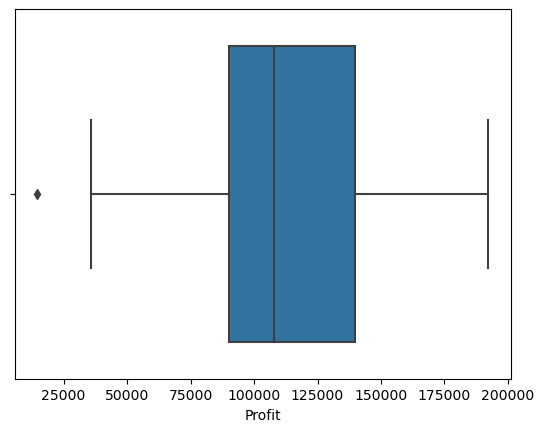

In [6]:
sns.boxplot(x =Startups['Profit'])

Variable 'profit' has an Outlier

<Axes: xlabel='R&D Spend'>

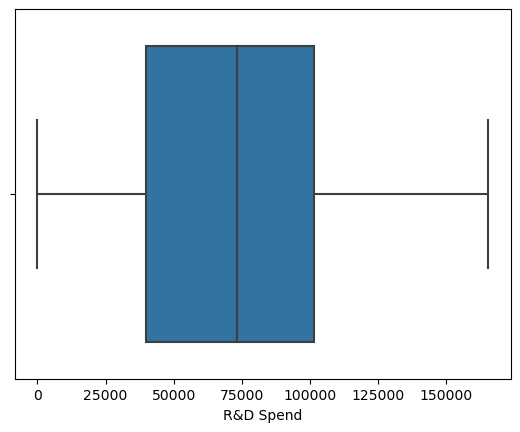

In [7]:
sns.boxplot(x = Startups['R&D Spend'])

<Axes: xlabel='Marketing Spend'>

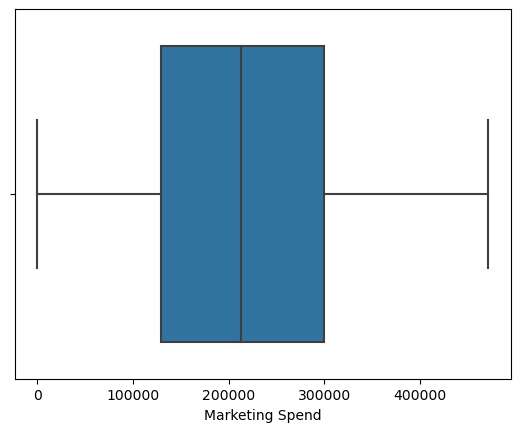

In [8]:
sns.boxplot(x = Startups['Marketing Spend'])

<Axes: xlabel='Administration'>

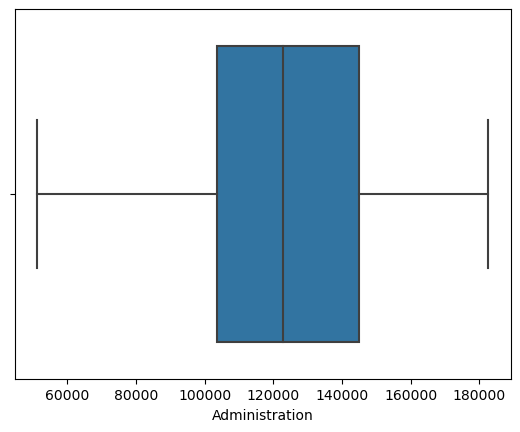

In [9]:
sns.boxplot(x = Startups['Administration'])

# Distplot

<Axes: xlabel='Marketing Spend', ylabel='Density'>

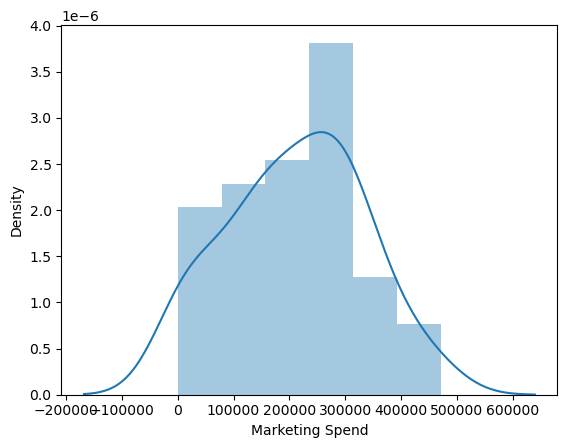

In [10]:
sns.distplot(Startups['Marketing Spend'])

<Axes: xlabel='R&D Spend', ylabel='Density'>

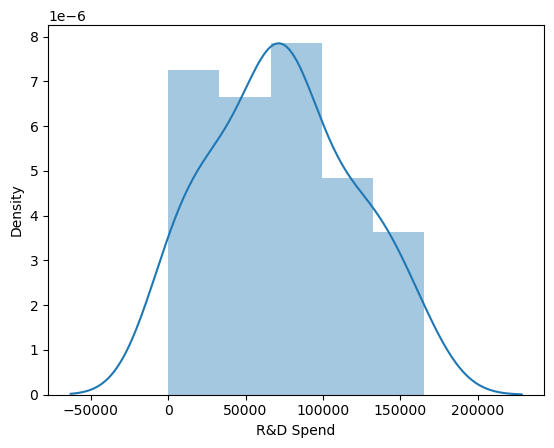

In [11]:
sns.distplot(Startups['R&D Spend'])

<Axes: xlabel='Profit', ylabel='Density'>

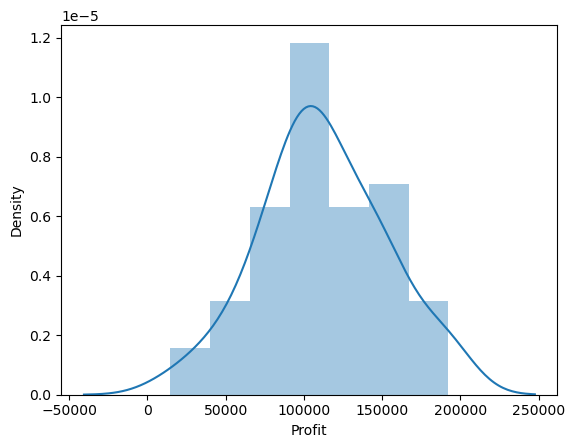

In [12]:
sns.distplot(Startups['Profit'])

<Axes: xlabel='Administration', ylabel='Density'>

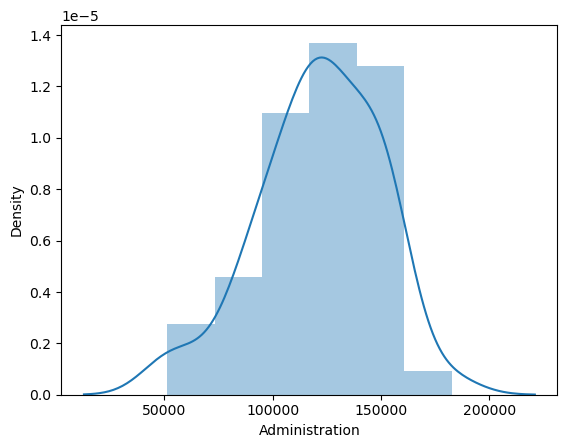

In [13]:
sns.distplot(Startups['Administration'])

# Pairplot

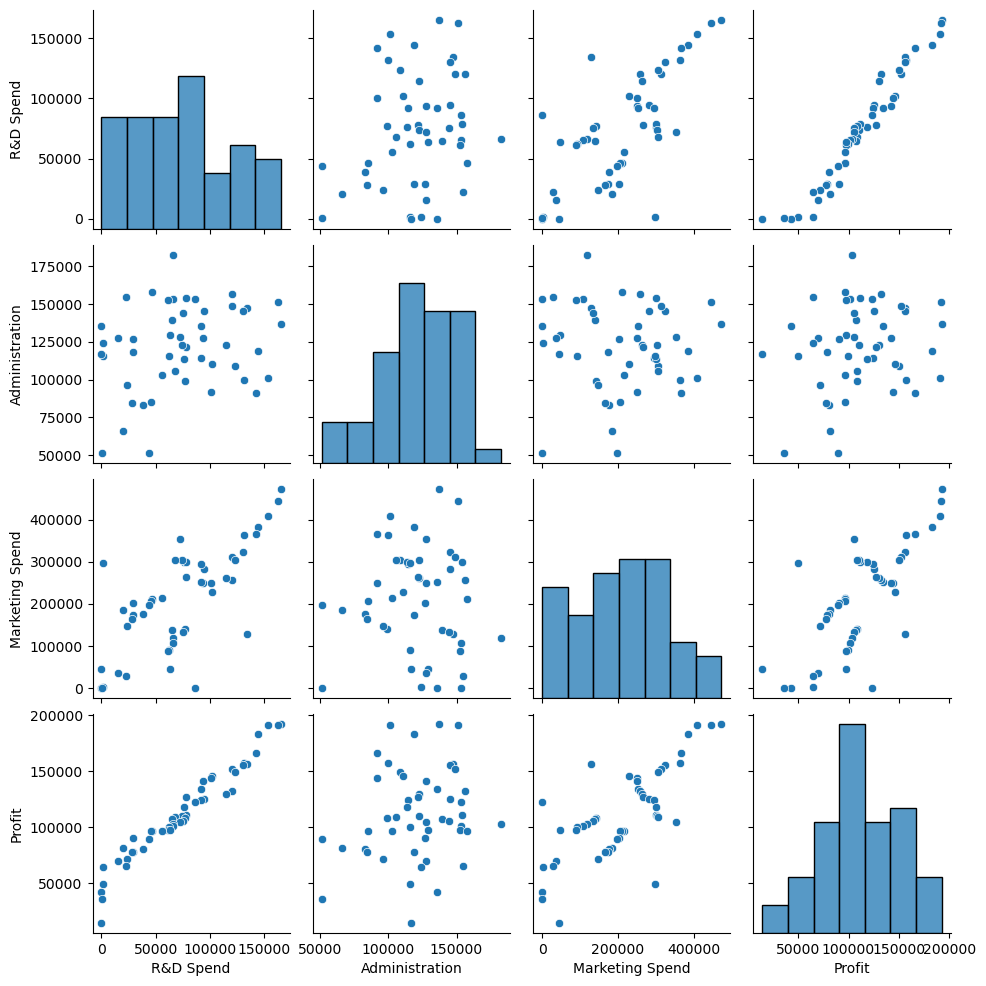

In [14]:
sns.pairplot(Startups)

# Heatmap

<Axes: >

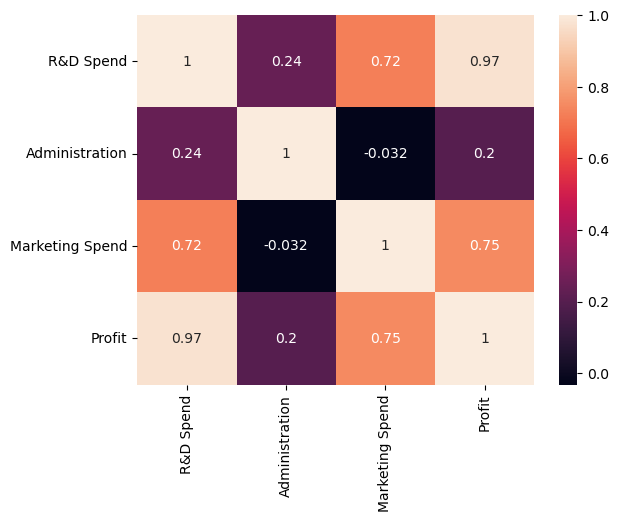

In [15]:
sns.heatmap(Startups.corr(), annot = True)

In [16]:
Startups = pd.get_dummies(Startups, columns=['State'])
Startups

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [17]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<Axes: >

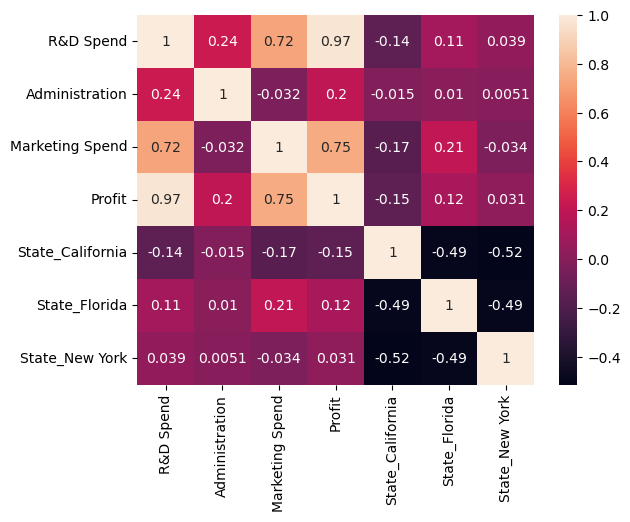

In [18]:
sns.heatmap(Startups.corr(), annot = True)

In [19]:
Startups.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace=True)
Startups.rename(columns={'R&D Spend':'RD_Spend'},inplace=True)
Startups.rename(columns={'State_New York':'State_New_York'},inplace=True)
Startups

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [20]:
Std = StandardScaler()
Startup_std = Std.fit_transform(Startups)
Startup_std = pd.DataFrame(Startup_std, columns = Startups.columns)
Startup_std

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741
5,1.279800,-0.776239,1.254210,1.127250,-0.717741,-0.685994,1.393261
6,1.340066,0.932147,-0.688150,1.105481,1.393261,-0.685994,-0.717741
7,1.245057,0.871980,0.932186,1.096210,-0.717741,1.457738,-0.717741
8,1.030369,0.986952,0.830887,1.007470,-0.717741,-0.685994,1.393261
9,1.091819,-0.456640,0.776107,0.946022,1.393261,-0.685994,-0.717741


# Model Building

In [21]:
Model1 = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York', Startup_std).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.34e-27
Time:                        13:27:25   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.343e-16      0.033   -1.6e-14      1.000      -0.067       0.067
RD_Spend             0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing_Spend      0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_New_York      -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
Model1.tvalues

Intercept          -1.597038e-14
RD_Spend            1.736858e+01
Administration     -5.170116e-01
Marketing_Spend     1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
State_New_York     -4.931619e-02
dtype: float64

In [23]:
Model1.pvalues

Intercept           1.000000e+00
RD_Spend            2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_New_York      9.608905e-01
dtype: float64

In [24]:
(Model1.rsquared, Model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [25]:
MODEL = smf.ols('Profit~RD_Spend', Startup_std).fit()
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.50e-32
Time:                        13:27:29   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.033  -1.61e-14      1.000      -0.067       0.067
RD_Spend       0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
Model2 = smf.ols('Profit~Administration', Startup_std).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.162
Time:                        13:27:30   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.378e-16      0.141   -3.8e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
Model3 = smf.ols('Profit~Marketing_Spend', Startup_std).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        13:27:30   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.378e-16      0.096  -5.61e-15      1.000      -0.193       0.193
Marketing_Spend     0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
Model4 = smf.ols('Profit~State_California', Startup_std).fit()
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.312
Time:                        13:27:31   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.378e-16      0.143  -3.77e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
Model5 = smf.ols('Profit~State_Florida', Startup_std).fit()
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.421
Time:                        13:27:32   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.378e-16      0.143  -3.75e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
Model6 = smf.ols('Profit~State_New_York', Startup_std).fit()
Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.829
Time:                        13:27:33   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.378e-16      0.144  -3.73e-15      1.000      -0.290       0.290
State_New_York     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF

In [31]:
RD = smf.ols('RD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_RD = 1/(1-RD)

ADMIN = smf.ols('Administration~RD_Spend+Marketing_Spend+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_ADMIN = 1/(1-ADMIN)

MARKETING = smf.ols('Marketing_Spend~RD_Spend+Administration+State_California+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_MARKETING = 1/(1-MARKETING) 

CALIFORNIA = smf.ols('State_California~RD_Spend+Administration+Marketing_Spend+State_Florida+State_New_York',data=Startup_std).fit().rsquared  
vif_CALIFORNIA = 1/(1-CALIFORNIA)

FLORIDA = smf.ols('State_Florida~RD_Spend+Administration+Marketing_Spend+State_California+State_New_York',data=Startup_std).fit().rsquared  
vif_FLORIDA = 1/(1-FLORIDA)

NEWYORK = smf.ols('State_New_York~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida',data=Startup_std).fit().rsquared  
vif_NEWYORK = 1/(1-NEWYORK)

In [32]:
DF = {'Features':['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York'],'VIF':[vif_RD,vif_ADMIN,vif_MARKETING,vif_CALIFORNIA,vif_FLORIDA,vif_NEWYORK]}
Vif_frame = pd.DataFrame(DF)  
Vif_frame

,Features,VIF
0,RD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [33]:
Model7 = smf.ols('Profit~RD_Spend+Marketing_Spend', Startups).fit()
Model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.16e-31
Time:                        13:27:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
(MODEL.rsquared, Model3.rsquared)

(0.9465353160804392, 0.5591535746115515)

In [35]:
(MODEL.aic, Model3.aic)

(-0.5428445147423275, 104.94091802371328)

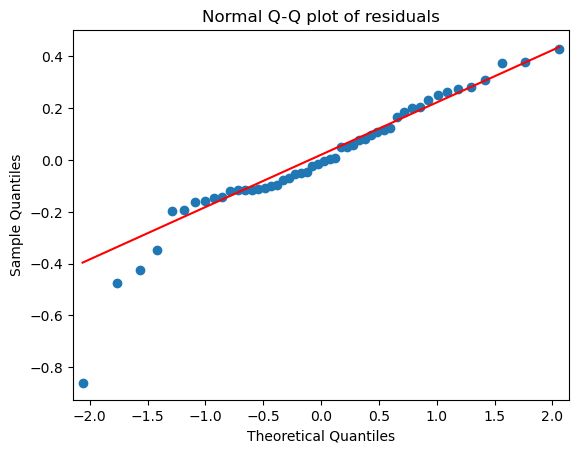

In [36]:
qqplot=sm.qqplot(MODEL.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

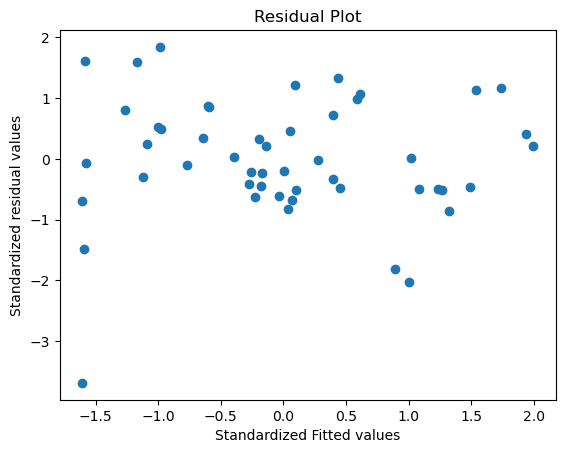

In [38]:
plt.scatter(get_standardized_values(MODEL.fittedvalues),
            get_standardized_values(MODEL.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


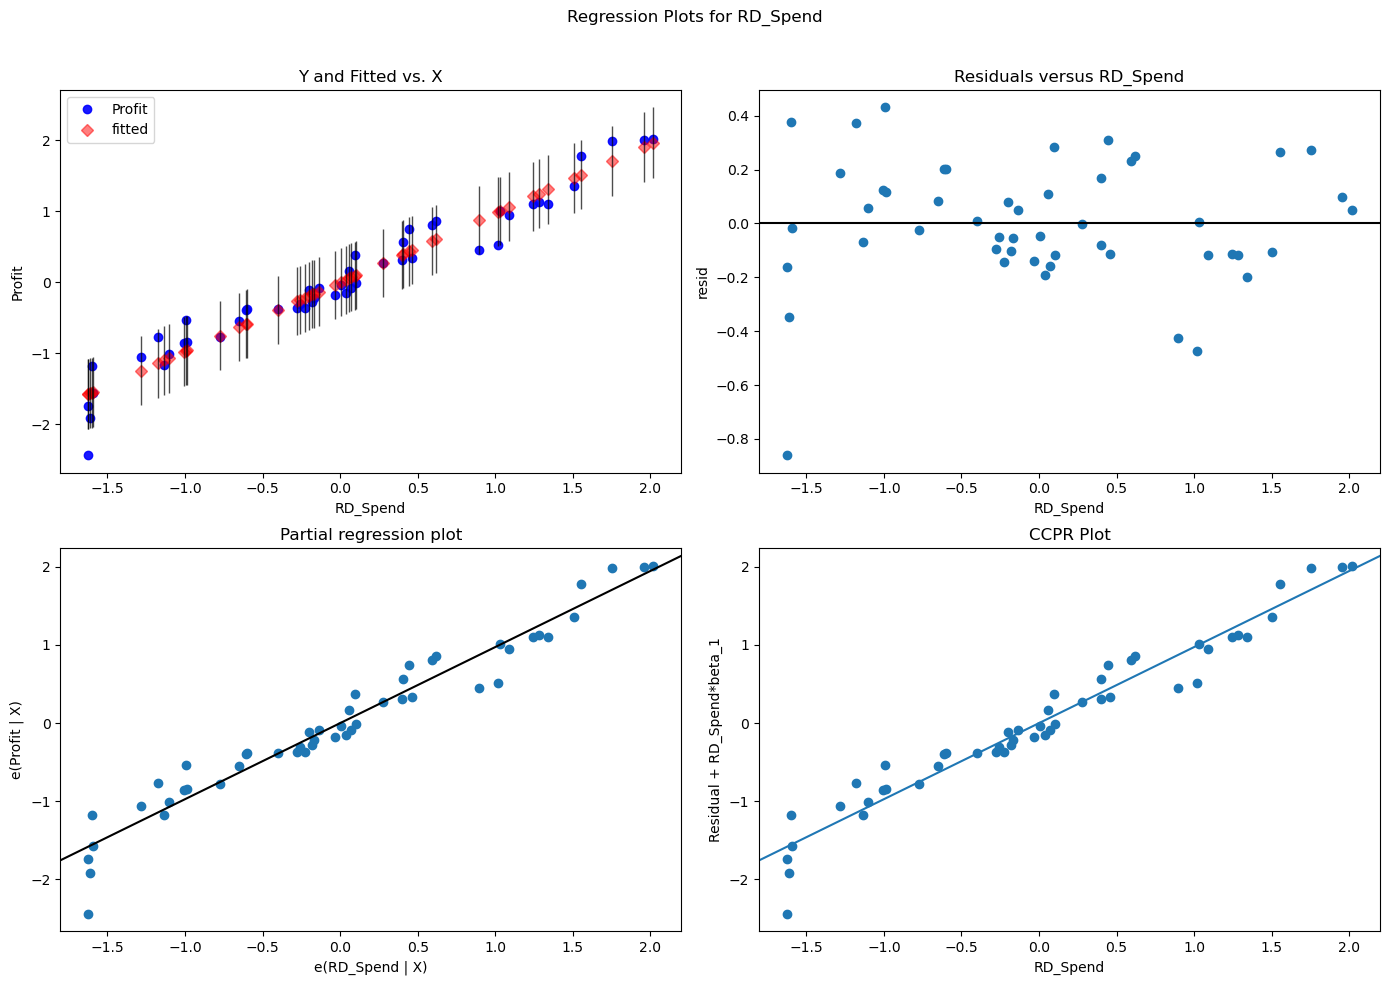

In [39]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(MODEL, "RD_Spend", fig=fig)
plt.show()

In [40]:
Model8 = MODEL.get_influence()
(c, _) = Model8.cooks_distance
(c, _)

(array([2.75252280e-03, 9.89908565e-03, 6.51765486e-02, 4.92628317e-02,
        7.59828403e-03, 7.33387104e-03, 2.21412554e-02, 6.73661506e-03,
        1.01619773e-05, 5.81403631e-03, 1.66061312e-02, 1.36996956e-02,
        2.16575937e-02, 6.13884016e-03, 8.90397517e-02, 6.30133674e-02,
        1.51718150e-02, 2.94329347e-03, 1.35430569e-03, 8.88551585e-07,
        2.17640968e-03, 2.60842890e-03, 4.21074221e-04, 4.82942604e-04,
        4.68512581e-03, 1.19729011e-03, 6.88519548e-03, 3.72111671e-03,
        5.73468418e-04, 2.01430573e-03, 5.31240320e-04, 1.80999487e-03,
        4.12635748e-03, 1.56789281e-05, 1.04277371e-02, 1.08303093e-02,
        7.16494391e-02, 1.81926575e-03, 6.59971284e-02, 1.80059405e-04,
        5.21569633e-03, 6.02155910e-03, 1.40828291e-03, 1.85762695e-02,
        2.18683314e-03, 1.05297577e-01, 2.04992283e-04, 1.99584124e-02,
        8.98899423e-02, 5.62061026e-01]),
 array([0.99725142, 0.99015177, 0.93698481, 0.95197896, 0.9924317 ,
        0.99269407, 0.9781

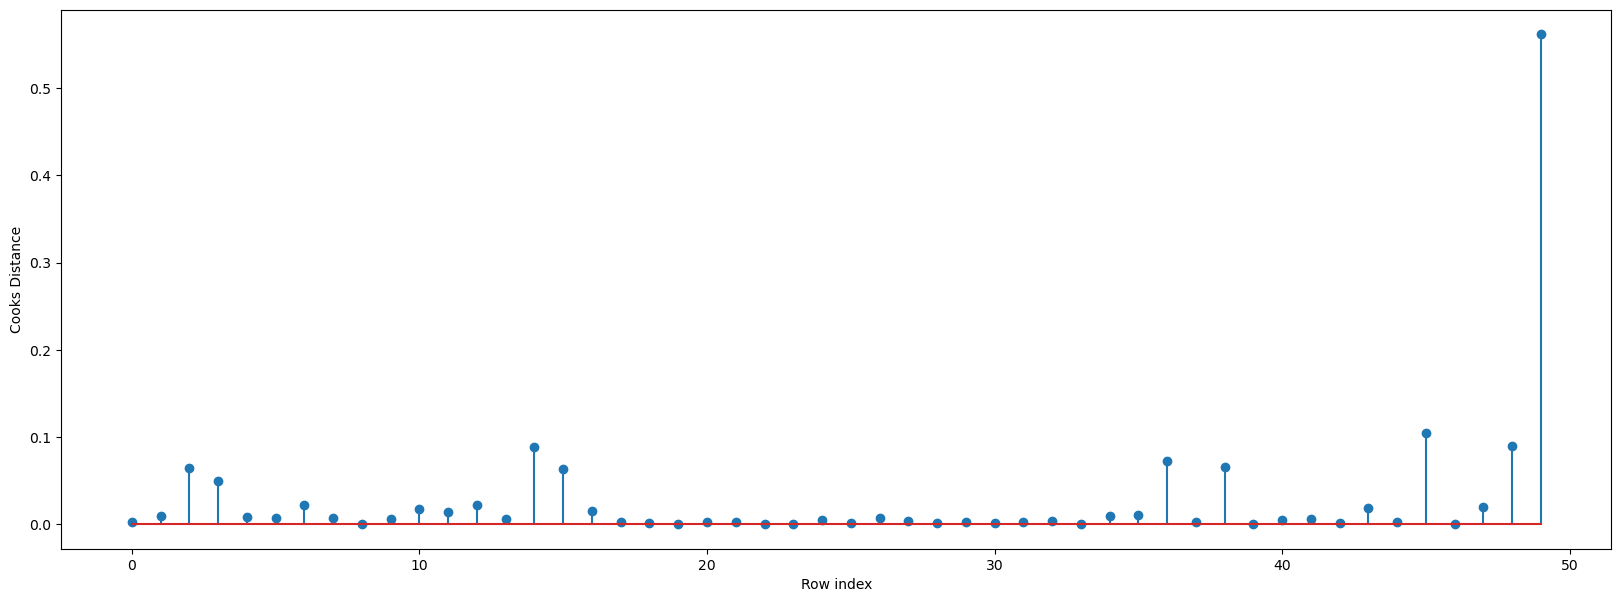

In [41]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(Startup_std)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [42]:
Startup=Startup_std.drop(Startup_std.index[[49]],axis=0).reset_index()
Startup.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
44,44,-1.134305,1.206419,-1.509074,-1.173209,1.393261,-0.685994,-0.717741
45,45,-1.600350,0.101254,-1.727400,-1.180082,-0.717741,-0.685994,1.393261
46,46,-1.593413,-0.199322,0.711122,-1.566922,-0.717741,1.457738,-0.717741
47,47,-1.622362,0.507722,-1.743127,-1.740627,1.393261,-0.685994,-0.717741
48,48,-1.610433,-2.509409,-1.743127,-1.913212,-0.717741,-0.685994,1.393261


In [43]:
FINAL = smf.ols('Profit~RD_Spend', Startup).fit()
FINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           7.56e-34
Time:                        13:27:45   Log-Likelihood:                 10.434
No. Observations:                  49   AIC:                            -16.87
Df Residuals:                      47   BIC:                            -13.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0186      0.029      0.651      0.519      -0.039       0.076
RD_Spend       0.9428      0.029     32.477      0.000       0.884       1.001
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
new_data=pd.DataFrame({'RD_Spend':100000},index=[1])
FINAL.predict(new_data)

1    94277.81544
dtype: float64